In [1]:
import gdelt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import re

In [2]:
df=pd.read_csv('gdelt_freq.csv')
df.head()

,Unnamed: 0,themes,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,...,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
0,0,tax_fncact,38715,60290,67725,40469,36985,71143,80095,83804,...,82478,85476,85928,80086,45966,39684,72786,82304,84150,86103
1,1,tax_ethnicity,19265,28466,34864,21783,21464,36145,39978,44531,...,36126,37506,38542,35054,19830,18451,32174,35082,36382,37317
2,2,epu_policy,19630,29291,32277,19607,18821,32345,37633,39421,...,41290,42843,42748,39982,22933,20598,36458,40683,42065,43042
3,3,crisislex_crisislexrec,18113,26661,32636,21047,19800,32567,36015,40342,...,46409,48114,47702,44714,26404,23549,39743,44251,45652,46541
4,4,tax_worldlanguages,14276,21284,23060,14157,13404,23341,26649,29827,...,26349,26831,27830,25746,15149,13597,23373,25938,27066,27720


In [3]:
df.shape

(57241, 123)

In [4]:
df = df.drop(columns = "Unnamed: 0")

In [5]:
df.shape
df.head()

,themes,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,...,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
0,tax_fncact,38715,60290,67725,40469,36985,71143,80095,83804,83510,...,82478,85476,85928,80086,45966,39684,72786,82304,84150,86103
1,tax_ethnicity,19265,28466,34864,21783,21464,36145,39978,44531,41083,...,36126,37506,38542,35054,19830,18451,32174,35082,36382,37317
2,epu_policy,19630,29291,32277,19607,18821,32345,37633,39421,39411,...,41290,42843,42748,39982,22933,20598,36458,40683,42065,43042
3,crisislex_crisislexrec,18113,26661,32636,21047,19800,32567,36015,40342,37627,...,46409,48114,47702,44714,26404,23549,39743,44251,45652,46541
4,tax_worldlanguages,14276,21284,23060,14157,13404,23341,26649,29827,28684,...,26349,26831,27830,25746,15149,13597,23373,25938,27066,27720


In [6]:
tax=df[df['themes'].str.contains("tax")]
policy=df[df['themes'].str.contains("policy")]
health=df[df['themes'].str.contains("health")]
disease=df[df['themes'].str.contains("disease")]
covid=df[df['themes'].str.contains("coronavirus")]
covid.head()

,themes,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,...,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
5901,tax_disease_coronavirus,3,8,18,18,8,28,16,18,281,...,42443,43499,43248,40724,23379,21045,36042,40426,40189,40272
6612,tax_disease_coronaviruses,1,0,0,6,0,3,5,9,192,...,207,261,287,276,192,132,215,269,477,424
26319,tax_disease_coronavirus_infections,0,0,0,0,0,0,0,0,1,...,734,812,840,1028,593,471,781,806,824,825
56864,tax_disease_swine_acute_diarrhea_syndrome_coro...,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
sumc=covid.iloc[:,1:].sum(axis=0)
sumc.head()

2020-01-01     4
2020-01-02     8
2020-01-03    18
2020-01-04    24
2020-01-05     8
dtype: int64

In [8]:
sumc=sumc.reset_index()



In [9]:
sumc.columns=('date','sum')
sumc.head()

,date,sum
0,2020-01-01,4
1,2020-01-02,8
2,2020-01-03,18
3,2020-01-04,24
4,2020-01-05,8


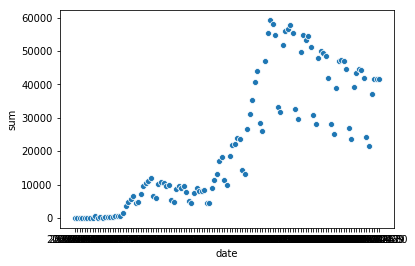

In [10]:
sns.scatterplot(x="date", y="sum",
                     data=sumc)

In [11]:
import datetime
from datetime import timedelta 

In [12]:
sumc['date'] = pd.to_datetime(sumc['date'])

In [13]:
d1 = datetime.datetime(2020, 1, 1) + timedelta(days=15) 
time_points = [d1]
d_temp = d1
for i in range(7):
    d_temp = d_temp + timedelta(days = 15)
    time_points.append(d_temp)
time_points

[datetime.datetime(2020, 1, 16, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 15, 0, 0),
 datetime.datetime(2020, 3, 1, 0, 0),
 datetime.datetime(2020, 3, 16, 0, 0),
 datetime.datetime(2020, 3, 31, 0, 0),
 datetime.datetime(2020, 4, 15, 0, 0),
 datetime.datetime(2020, 4, 30, 0, 0)]

In [14]:
time_points_index = [0]
for i in time_points[:7]:
    print(i)
    time_points_index.append(sumc[sumc['date']==i].index[0])
time_points_index.append(sumc.shape[0])
time_points_index

2020-01-16 00:00:00
2020-01-31 00:00:00
2020-02-15 00:00:00
2020-03-01 00:00:00
2020-03-16 00:00:00
2020-03-31 00:00:00
2020-04-15 00:00:00


[0, 15, 30, 45, 60, 75, 90, 105, 121]

In [15]:
df_time= pd.DataFrame({'date':['01-01 ~ 01-15', '01-16 ~ 01-30', '01-31 ~ 02-15', '02-16 ~ 02-29', 
                      '03-01 ~ 03-15', '03-16 ~ 03-30', '03-31 ~ 04-15', '04-16 ~ 04-30']})
df_time

,date
0,01-01 ~ 01-15
1,01-16 ~ 01-30
2,01-31 ~ 02-15
3,02-16 ~ 02-29
4,03-01 ~ 03-15
5,03-16 ~ 03-30
6,03-31 ~ 04-15
7,04-16 ~ 04-30


In [16]:
count=[]
for i in range(8):
    temp=sumc.iloc[time_points_index[i]:time_points_index[i+1],1].sum()
    count.append(temp)
count

[1834, 71772, 130256, 139699, 379767, 728411, 649185, 610337]

In [17]:
df_time['covid']=count
df_time

,date,covid
0,01-01 ~ 01-15,1834
1,01-16 ~ 01-30,71772
2,01-31 ~ 02-15,130256
3,02-16 ~ 02-29,139699
4,03-01 ~ 03-15,379767
5,03-16 ~ 03-30,728411
6,03-31 ~ 04-15,649185
7,04-16 ~ 04-30,610337


In [18]:
total=df.iloc[:,1:].sum(axis=0)
total=total.reset_index()
total.columns=('date','sum')
total.shape

(121, 2)

In [19]:
tot=[]
for i in range(8):
    temp=total.iloc[time_points_index[i]:time_points_index[i+1],1].sum()
    tot.append(temp)
tot

[33453248,
 36874727,
 38585513,
 36348497,
 39045705,
 45931264,
 43247153,
 45817408]

In [20]:
df_time['total']=tot
df_time

,date,covid,total
0,01-01 ~ 01-15,1834,33453248
1,01-16 ~ 01-30,71772,36874727
2,01-31 ~ 02-15,130256,38585513
3,02-16 ~ 02-29,139699,36348497
4,03-01 ~ 03-15,379767,39045705
5,03-16 ~ 03-30,728411,45931264
6,03-31 ~ 04-15,649185,43247153
7,04-16 ~ 04-30,610337,45817408


In [21]:
df_time['percent']=df_time['covid']/df_time['total']
df_time

,date,covid,total,percent
0,01-01 ~ 01-15,1834,33453248,0.000055
1,01-16 ~ 01-30,71772,36874727,0.001946
2,01-31 ~ 02-15,130256,38585513,0.003376
3,02-16 ~ 02-29,139699,36348497,0.003843
4,03-01 ~ 03-15,379767,39045705,0.009726
5,03-16 ~ 03-30,728411,45931264,0.015859
6,03-31 ~ 04-15,649185,43247153,0.015011
7,04-16 ~ 04-30,610337,45817408,0.013321


Text(0, 0.5, 'Count')

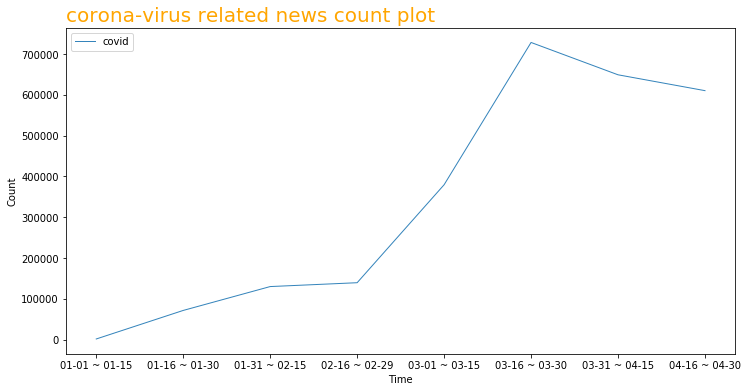

In [22]:
plt.figure(figsize = (12,6))
palette = plt.get_cmap('Set1')


plt.plot(df_time['date'], df_time['covid'], marker='', linewidth=1, alpha=0.9)
    
plt.legend(loc=2, ncol=2)
 
# titles
plt.title("corona-virus related news count plot", loc='left', fontsize=20, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Count")

Text(0, 0.5, 'Percentage')

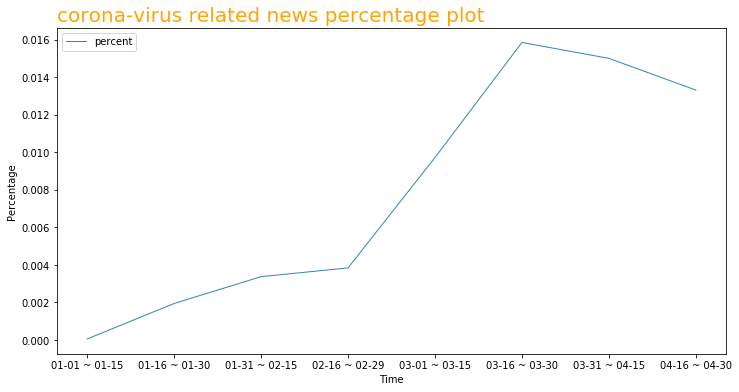

In [23]:
plt.figure(figsize = (12,6))
palette = plt.get_cmap('Set1')


plt.plot(df_time['date'], df_time['percent'], marker='', linewidth=1, alpha=0.9)
    
plt.legend(loc=2, ncol=2)
 
# titles
plt.title("corona-virus related news percentage plot", loc='left', fontsize=20, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Percentage")

**get the themes that have most changes in last three months**


In [24]:
df.head()

,themes,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,...,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30
0,tax_fncact,38715,60290,67725,40469,36985,71143,80095,83804,83510,...,82478,85476,85928,80086,45966,39684,72786,82304,84150,86103
1,tax_ethnicity,19265,28466,34864,21783,21464,36145,39978,44531,41083,...,36126,37506,38542,35054,19830,18451,32174,35082,36382,37317
2,epu_policy,19630,29291,32277,19607,18821,32345,37633,39421,39411,...,41290,42843,42748,39982,22933,20598,36458,40683,42065,43042
3,crisislex_crisislexrec,18113,26661,32636,21047,19800,32567,36015,40342,37627,...,46409,48114,47702,44714,26404,23549,39743,44251,45652,46541
4,tax_worldlanguages,14276,21284,23060,14157,13404,23341,26649,29827,28684,...,26349,26831,27830,25746,15149,13597,23373,25938,27066,27720


In [25]:
change=df.iloc[:,0]
change.shape
cc=df.iloc[:,1:16].sum(axis=1)
change

0                                               tax_fncact
1                                            tax_ethnicity
2                                               epu_policy
3                                   crisislex_crisislexrec
4                                       tax_worldlanguages
5                                                   leader
6                                     soc_pointsofinterest
7                                  uspec_politics_general1
8                          wb_696_public_sector_management
9                               ungp_forests_rivers_oceans
10                                    crisislex_c07_safety
11                                      general_government
12                                           uspec_policy1
13                                               media_msm
14                                               education
15                 wb_2432_fragility_conflict_and_violence
16                                manmade_disaster_impli

In [26]:

change=df.iloc[:,0]
change.columns=('themes')
change.reset_index()
change.shape

(57241,)

In [27]:
change.head()

0                tax_fncact
1             tax_ethnicity
2                epu_policy
3    crisislex_crisislexrec
4        tax_worldlanguages
Name: themes, dtype: object

In [28]:
for i in range(8):
    temp=df.iloc[:,(1+time_points_index[i]):(time_points_index[i+1]+1)].sum(axis=1)
    change=pd.concat([change,temp], axis=1) 
change.shape

(57241, 9)

In [29]:
change.columns=('themes','timeslot1','timeslot2','timeslot3','timeslot4','timeslot5','timeslot6','timeslot7','timeslot8')
change.head()

,themes,timeslot1,timeslot2,timeslot3,timeslot4,timeslot5,timeslot6,timeslot7,timeslot8
0,tax_fncact,956153,1048820,1082944,1018480,1061913,1139420,1079338,1156299
1,tax_ethnicity,479473,512356,530265,496703,486958,499221,474698,508275
2,epu_policy,458174,519643,538091,502122,525890,605041,545239,580832
3,crisislex_crisislexrec,438911,451171,464675,446110,493341,655844,640977,649811
4,tax_worldlanguages,336222,386451,408262,377941,368692,361366,349698,372315


In [30]:
change_new = change[change['timeslot1'] >= 100]
change_new.shape

(4616, 9)

In [31]:
increase50=change_new[0.5<=((change_new['timeslot8']-change_new['timeslot1'])/change_new['timeslot1']<=1)]

In [32]:
increase50['percentage_change']=(increase50['timeslot8']-increase50['timeslot1'])/increase50['timeslot1']

C:\Users\chenx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
increase50=increase50.sort_values('percentage_change',ascending=False)
increase50.to_csv(r'increase50.csv', index = False)

In [34]:
increase=change_new[(change_new['timeslot8']-change_new['timeslot1'])/change_new['timeslot1']>=1]

In [35]:
increase['percentage_change']=(increase['timeslot8']-increase['timeslot1'])/increase['timeslot1']

C:\Users\chenx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
increase

,themes,timeslot1,timeslot2,timeslot3,timeslot4,timeslot5,timeslot6,timeslot7,timeslot8,percentage_change
17,general_health,203091,265873,304134,303914,458267,793650,776483,794812,2.913576
19,medical,191396,248558,285423,278701,411272,641309,605370,591759,2.091804
20,wb_621_health_nutrition_and_population,193447,264423,313067,306104,451666,750281,725082,743848,2.845229
34,crisislex_c03_wellbeing_health,141357,169240,187981,186153,254504,394318,393445,364667,1.579759
35,tax_disease,144270,217687,275474,279625,491116,830887,755296,735525,4.098253
53,epu_economy,110808,138551,142782,133195,148404,212613,194782,254205,1.294103
64,wb_1406_diseases,96983,128576,143108,145513,208675,275861,252490,248145,1.558644
85,soc_pointsofinterest_hospital,55405,69632,80292,77285,96511,156808,175144,151912,1.741846
90,wb_1331_health_technologies,54144,66024,76571,67948,74660,125320,122531,112035,1.069204
91,wb_635_public_health,64365,123944,167926,168801,314154,618260,602726,615359,8.560460


In [37]:
increase=increase.sort_values('percentage_change',ascending=False)

In [38]:
increase.to_csv(r'increase.csv', index = False)

In [39]:
decrease=change_new[(change_new['timeslot1']-change_new['timeslot8'])/change_new['timeslot1']>=0.6]

In [40]:
decrease['percentage_change']=(decrease['timeslot8']-decrease['timeslot1'])/decrease['timeslot1']

C:\Users\chenx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
decrease=decrease.sort_values('percentage_change')
decrease

,themes,timeslot1,timeslot2,timeslot3,timeslot4,timeslot5,timeslot6,timeslot7,timeslot8,percentage_change
29550,tax_worldmammals_longfooted_potoroo,199,118,2,6,2,1,0,0,-1.000000
29254,tax_worldbirds_glossy_blackcockatoos,102,4,3,0,1,0,0,0,-1.000000
9142,tax_terror_group_islamic_jihad_group,102,12,2,186,5,3,0,0,-1.000000
18605,tax_worldlanguages_khalaj,100,5,1,0,1,1,1,0,-1.000000
8759,tax_terror_group_mahdi_army,187,15,20,7,3,10,2,0,-1.000000
22090,tax_worldlanguages_bornas,195,252,6,0,0,1,1,0,-1.000000
23955,tax_worldbirds_glossy_blackcockatoo,174,14,5,1,1,1,0,1,-0.994253
13732,tax_worldlanguages_malua_bay,169,25,32,13,17,3,3,1,-0.994083
11052,tax_terror_group_quds_forces,465,87,22,64,4,7,9,3,-0.993548
24430,tax_worldmammals_brushtailed_rockwallaby,118,15,2,1,2,0,0,1,-0.991525


In [42]:
decrease.to_csv(r'decrease.csv', index = False)

**plot the trend of decreasing news**

In [87]:
terror=decrease[decrease['themes'].str.contains("terror")]
weap=decrease[decrease['themes'].str.contains("weapon" or 'war')]
dis=decrease[decrease['themes'].str.contains("military")]
world=decrease[decrease['themes'].str.contains("assassination")]
traffic=decrease[decrease['themes'].str.contains("war_crime")]
religion=decrease[decrease['themes'].str.contains("religion" or "ethnicity")]
politics=decrease[decrease['themes'].str.contains("politi")]

In [88]:
terror.reset_index()
weap.reset_index()
dis.reset_index()
world.reset_index()
traffic.reset_index()
religion.reset_index()
politics.reset_index()

,index,themes,timeslot1,timeslot2,timeslot3,timeslot4,timeslot5,timeslot6,timeslot7,timeslot8,percentage_change
0,9655,tax_political_party_people_first_party,292,15,2,4,3,1,0,3,-0.989726
1,8720,tax_political_party_austrian_people_party,135,11,14,12,5,0,5,2,-0.985185
2,8525,tax_political_party_croatian_democratic_union,195,11,9,4,4,7,1,4,-0.979487
3,5539,tax_political_party_shiromani_akali_dal,295,342,150,149,71,31,70,16,-0.945763
4,4363,tax_political_party_kuomintang,1144,151,68,47,67,46,71,81,-0.929196
5,4179,tax_political_party_bahujan_samaj_party,309,245,186,86,353,83,53,22,-0.928803
6,7590,tax_political_party_all_progressives_grand_all...,105,82,83,47,22,28,11,8,-0.923810
7,1576,tax_political_party_hezbollah,10630,2300,1228,1304,2263,1411,833,1072,-0.899153
8,3621,tax_political_party_democratic_progressive_party,1897,364,389,244,261,221,236,208,-0.890353
9,3462,tax_political_party_unionist_party,579,111,253,87,89,41,80,65,-0.887737


In [89]:
terror=terror.iloc[:,1:].sum(axis=0)
weap=weap.iloc[:,1:].sum(axis=0)
dis=dis.iloc[:,1:].sum(axis=0)
world=world.iloc[:,1:].sum(axis=0)
traffic=traffic.iloc[:,1:].sum(axis=0)
religion=religion.iloc[:,1:].sum(axis=0)
politics=politics.iloc[:,1:].sum(axis=0)

In [90]:
terror=terror.reset_index()
weap=weap.reset_index()
dis=dis.reset_index()
world=world.reset_index()
traffic=traffic.reset_index()
religion=religion.reset_index()
politics=politics.reset_index()

In [91]:
weap

,index,0
0,timeslot1,42284.000000
1,timeslot2,16362.000000
2,timeslot3,9444.000000
3,timeslot4,8418.000000
4,timeslot5,9203.000000
5,timeslot6,3968.000000
6,timeslot7,3713.000000
7,timeslot8,4650.000000
8,percentage_change,-20.587167


In [92]:
dis

,index,0
0,timeslot1,82547.000000
1,timeslot2,49884.000000
2,timeslot3,35993.000000
3,timeslot4,22990.000000
4,timeslot5,20299.000000
5,timeslot6,14873.000000
6,timeslot7,15843.000000
7,timeslot8,16147.000000
8,percentage_change,-12.837021


In [93]:
df_time['terror']=terror.iloc[:8,1]
df_time['weap']=weap.iloc[:8,1]
df_time['dis']=dis.iloc[:8,1]
df_time['world']=world.iloc[:8,1]
df_time['traffic']=traffic.iloc[:8,1]
df_time['religion']=religion.iloc[:8,1]
df_time['politics']=politics.iloc[:8,1]

df_time['terror_z']=(terror.iloc[:8,1]-np.mean(terror.iloc[:8,1]))/np.std(terror.iloc[:8,1])

df_time['weap_z']=(weap.iloc[:8,1]-np.mean(weap.iloc[:8,1]))/np.std(weap.iloc[:8,1])

df_time['dis_z']=(dis.iloc[:8,1]-np.mean(dis.iloc[:8,1]))/np.std(dis.iloc[:8,1])

df_time['world_z']=(world.iloc[:8,1]-np.mean(world.iloc[:8,1]))/np.std(world.iloc[:8,1])

df_time['traffic_z']=(traffic.iloc[:8,1]-np.mean(traffic.iloc[:8,1]))/np.std(traffic.iloc[:8,1])

df_time['religion_z']=(religion.iloc[:8,1]-np.mean(religion.iloc[:8,1]))/np.std(religion.iloc[:8,1])

df_time['politics_z']=(politics.iloc[:8,1]-np.mean(politics.iloc[:8,1]))/np.std(politics.iloc[:8,1])

In [94]:
df_time

,date,covid,total,percent,terror,weap,dis,world,traffic,religion,politics,terror_z,weap_z,dis_z,world_z,traffic_z,religion_z,politics_z
0,01-01 ~ 01-15,1834,33453248,0.000055,149286.0,42284.0,82547.0,10626.0,4152.0,64414.0,26162.0,2.458543,2.504545,2.270747,2.591747,2.147567,2.541444,2.399635
1,01-16 ~ 01-30,71772,36874727,0.001946,60619.0,16362.0,49884.0,2965.0,2425.0,26806.0,10675.0,0.008538,0.342523,0.794004,0.074226,0.527629,-0.053281,0.116904
2,01-31 ~ 02-15,130256,38585513,0.003376,67944.0,9444.0,35993.0,2022.0,2119.0,23815.0,12147.0,0.210939,-0.234472,0.165971,-0.235658,0.240599,-0.259641,0.333872
3,02-16 ~ 02-29,139699,36348497,0.003843,59370.0,8418.0,22990.0,1767.0,1966.0,28036.0,8545.0,-0.025974,-0.320046,-0.421914,-0.319455,0.097084,0.031582,-0.197051
4,03-01 ~ 03-15,379767,39045705,0.009726,48291.0,9203.0,20299.0,1308.0,1833.0,24663.0,8641.0,-0.332103,-0.254573,-0.543578,-0.470289,-0.027671,-0.201135,-0.182901
5,03-16 ~ 03-30,728411,45931264,0.015859,31331.0,3968.0,14873.0,987.0,657.0,18526.0,4847.0,-0.800734,-0.691197,-0.788895,-0.575775,-1.130768,-0.624550,-0.742123
6,03-31 ~ 04-15,649185,43247153,0.015011,34603.0,3713.0,15843.0,1091.0,717.0,16132.0,4039.0,-0.710324,-0.712466,-0.745040,-0.541599,-1.074487,-0.789722,-0.861220
7,04-16 ~ 04-30,610337,45817408,0.013321,31036.0,4650.0,16147.0,1147.0,1031.0,18234.0,3999.0,-0.808885,-0.634315,-0.731296,-0.523196,-0.779953,-0.644697,-0.867116


Text(0, 0.5, 'Count')

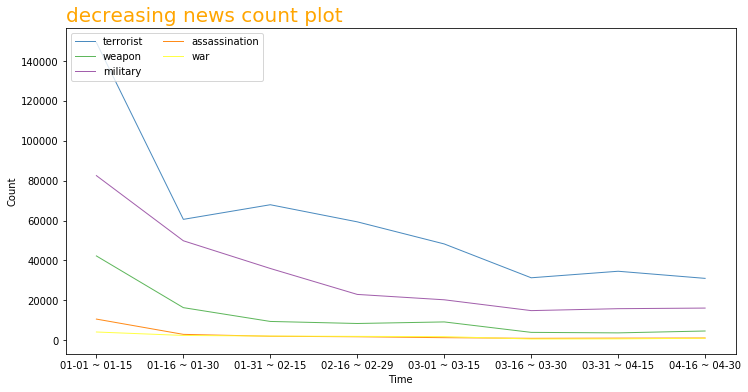

In [98]:
plt.figure(figsize = (12,6))
palette = plt.get_cmap('Set1')


plt.plot(df_time['date'], df_time['terror'], marker='', color=palette(1),linewidth=1, alpha=0.9,label='terrorist')
plt.plot(df_time['date'], df_time['weap'], marker='', color=palette(2), linewidth=1, alpha=0.9,label='weapon')
plt.plot(df_time['date'], df_time['dis'], marker='', color=palette(3), linewidth=1, alpha=0.9,label='military')

plt.plot(df_time['date'], df_time['world'], marker='', color=palette(4), linewidth=1, alpha=0.9,label='assassination')
plt.plot(df_time['date'], df_time['traffic'], marker='', color=palette(5), linewidth=1, alpha=0.9,label='war')
plt.legend(loc=2, ncol=2)
 
# titles
plt.title("decreasing news count plot", loc='left', fontsize=20, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Count")

Text(0, 0.5, 'Z_score')

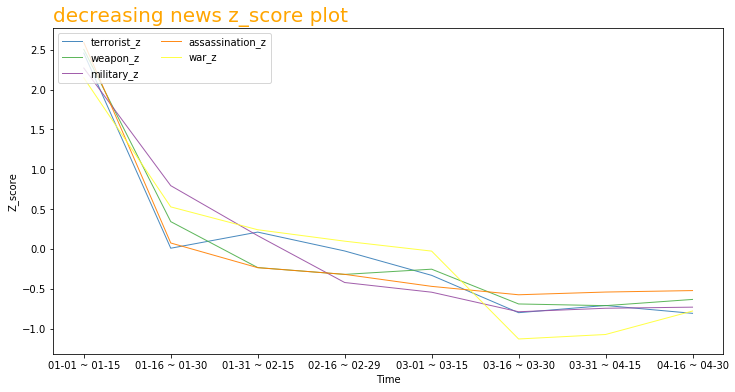

In [100]:
plt.figure(figsize = (12,6))
palette = plt.get_cmap('Set1')


plt.plot(df_time['date'], df_time['terror_z'], marker='', color=palette(1),linewidth=1, alpha=0.9,label='terrorist_z')
plt.plot(df_time['date'], df_time['weap_z'], marker='', color=palette(2), linewidth=1, alpha=0.9, label='weapon_z')
plt.plot(df_time['date'], df_time['dis_z'], marker='', color=palette(3), linewidth=1, alpha=0.9,label='military_z')
plt.plot(df_time['date'], df_time['world_z'], marker='', color=palette(4), linewidth=1, alpha=0.9,label='assassination_z')
plt.plot(df_time['date'], df_time['traffic_z'], marker='', color=palette(5), linewidth=1, alpha=0.9,label='war_z')

plt.legend(loc=2, ncol=2)
 
# titles
plt.title("decreasing news z_score plot", loc='left', fontsize=20, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Z_score")